In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import KBinsDiscretizer
import warnings 
warnings.filterwarnings('ignore')

In [46]:
dataset2 = pd.read_csv('train_Insurance.csv')
dataset1 = pd.read_csv('test_Insurance.csv')
nombre_lignes_fichier1 = len(dataset1)
print(nombre_lignes_fichier1)
df = pd.concat([dataset1, dataset2], ignore_index=True)

# df=pd.read_csv('train_Insurance.csv')
df

2147


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7154,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
7155,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
7156,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
7157,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7159 entries, 0 to 7158
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7159 non-null   object 
 1   YearOfObservation   7159 non-null   int64  
 2   Insured_Period      7159 non-null   float64
 3   Residential         7159 non-null   int64  
 4   Building_Painted    7159 non-null   object 
 5   Building_Fenced     7159 non-null   object 
 6   Garden              7152 non-null   object 
 7   Settlement          7159 non-null   object 
 8   Building Dimension  7053 non-null   float64
 9   Building_Type       7159 non-null   object 
 10  NumberOfWindows     7159 non-null   object 
 11  Geo_Code            7057 non-null   object 
 12  Claim               7159 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 727.2+ KB


In [48]:
df.drop(labels=['Customer Id'],axis=1,inplace=True)
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...
7154,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
7155,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
7156,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
7157,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [49]:
df.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [50]:
df.duplicated().sum()

70

In [51]:
df=df.drop_duplicates()
df.reset_index(drop=True,inplace=True)
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non


In [52]:
df['NumberOfWindows'] = df['NumberOfWindows'].replace('without', 0)
df['NumberOfWindows'] = df['NumberOfWindows'].replace('>=10', 10)
df['NumberOfWindows'] = pd.to_numeric(df['NumberOfWindows'])
df['NumberOfWindows'] = df['NumberOfWindows'].astype(int)

df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,0,43157,oui
1,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,0,13209,oui
4,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non


In [53]:
df.describe(include='all')

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,7089.000000,7089.000000,7089.000000,7089,7089,7082,7089,7036.000000,7089,7089.000000,7040,7089
unique,NaN,NaN,NaN,2,2,2,2,NaN,4,NaN,1307,2
top,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,NaN,6088,non
freq,NaN,NaN,NaN,5318,3600,3594,3602,NaN,3260,NaN,143,5464
mean,2013.676118,0.871562,0.305262,NaN,NaN,NaN,NaN,1884.664298,NaN,2.199887,NaN,NaN
std,1.385610,0.218471,0.460551,NaN,NaN,NaN,NaN,2279.364131,NaN,2.520059,NaN,NaN
min,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN
25%,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,528.000000,NaN,0.000000,NaN,NaN
50%,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1083.500000,NaN,1.000000,NaN,NaN
75%,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2290.500000,NaN,4.000000,NaN,NaN


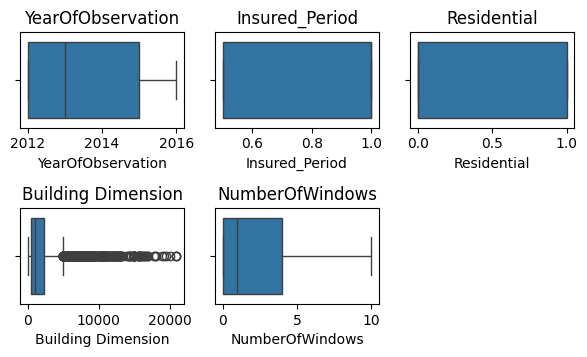

In [54]:
l_num=list(df.select_dtypes(include='number'))
plt.figure(figsize=(6,5))
for i in range(len(l_num)):
   plt.subplot(3,3,i+1)
   sns.boxplot(data=df,x=l_num[i])
   plt.title(l_num[i])
plt.tight_layout()
plt.show()

Pour la collone building type 
_____________________________________________
|   Building Type   |    Numero associe      |
|___________________|________________________|
|  Fire-resistive   |           1            |
|___________________|________________________|
|  Non-combustible  |           2            |
|___________________|________________________|
|    Ordinary       |           3            |
|___________________|________________________|
|   Wood-framed     |           4            |
|___________________|________________________|

In [55]:
# df['Building_Painted']=df['Building_Painted'].apply(lambda x: 1 if x == 'V' else 0)
# df['Building_Fenced']=df['Building_Fenced'].apply(lambda x: 1 if x == 'V' else 0)
# df['Garden']=df['Garden'].apply(lambda x: 1 if x == 'V' else 0)
# df['NumberOfWindows']=df['NumberOfWindows'].apply(lambda x: 0 if x=='without'else x)
# mapping = {'Fire-resistive': 1,'Non-combustible': 2,'Ordinary': 3,'Wood-framed': 4}
# df['Building_Type'] = df['Building_Type'].replace(mapping)

# df.info()


<Axes: xlabel='Building Dimension'>

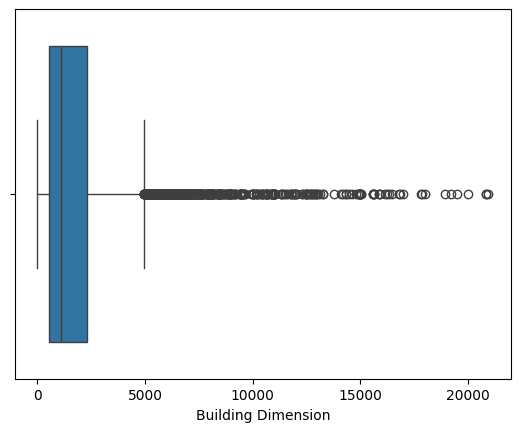

In [56]:
sns.boxplot(data=df,x='Building Dimension')

<Axes: xlabel='Building Dimension', ylabel='Density'>

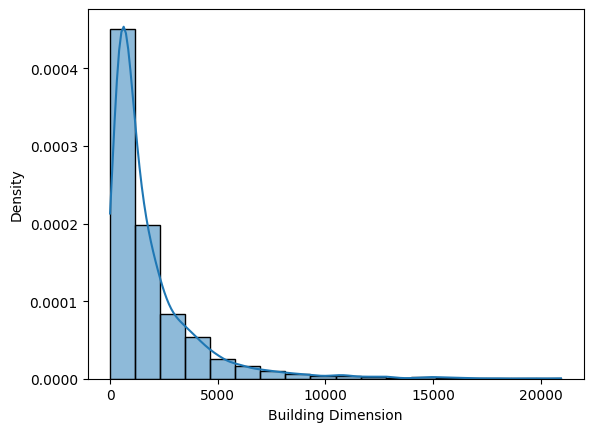

In [57]:
sns.histplot(x="Building Dimension", data=df,bins=18, kde=True, stat='density')

In [58]:
# standard_scaler= RobustScaler()
# arr= standard_scaler.fit_transform(df[['Building Dimension']])
# df['Building Dimension']=pd.DataFrame(arr)


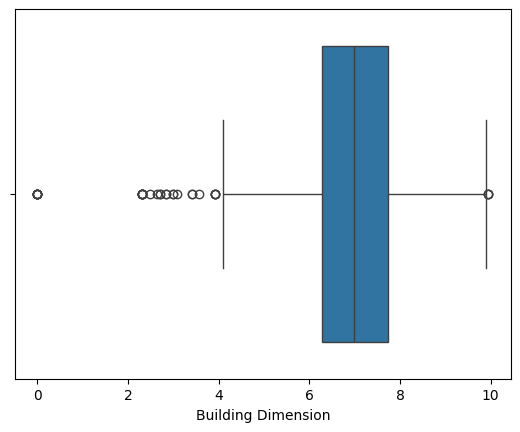

In [59]:
df_b_log = df[['Building Dimension']].apply(np.log)
sns.boxplot(data=df_b_log,x='Building Dimension')
df['Building Dimension']=df_b_log


<Axes: xlabel='Building Dimension'>

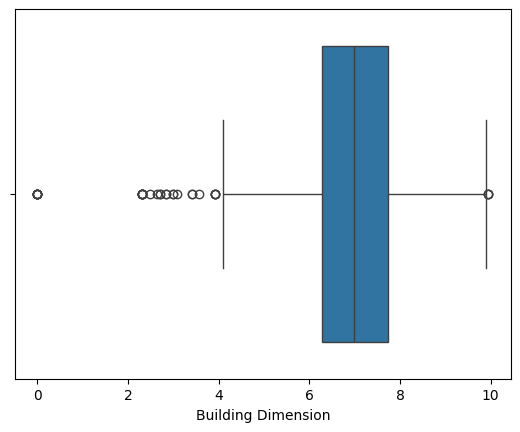

In [60]:
def adjust_outliers(df, col):
    Q1,Q3=np.percentile(df[col], [25,75])
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    df[col]=np.where(df[col]>upper_limit,
    upper_limit, np.where(df[col]<lower_limit,
    lower_limit,df[col]))

adjust_outliers(df,'Building Dimension')
sns.boxplot(data=df,x='Building Dimension')

<Axes: xlabel='Residential', ylabel='Building Dimension'>

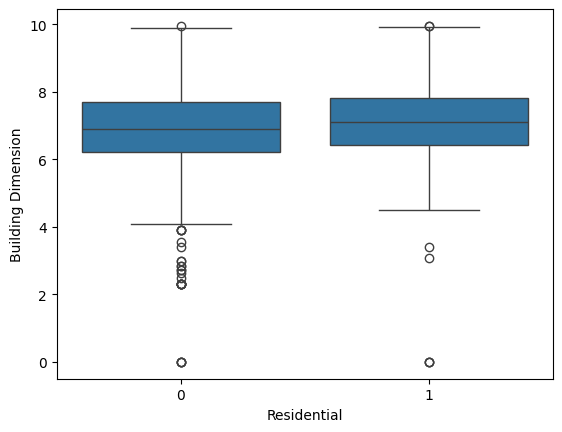

In [61]:
sns.boxplot(x=df['Residential'],y=df['Building Dimension'])

<Axes: xlabel='NumberOfWindows', ylabel='Building Dimension'>

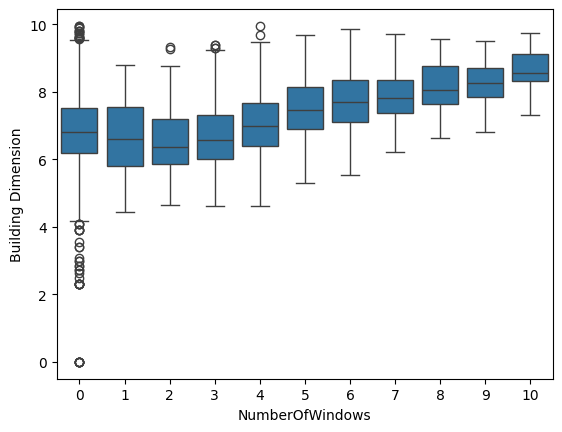

In [62]:
sns.boxplot(x=df['NumberOfWindows'],y=df['Building Dimension'])

In [63]:
list_mean_windows = list(df.groupby(['NumberOfWindows'])['Building Dimension'].mean())
switch = {
    0: list_mean_windows[0],1: list_mean_windows[1],2: list_mean_windows[2],3: list_mean_windows[3],
    4: list_mean_windows[4],5: list_mean_windows[5],6: list_mean_windows[6],7: list_mean_windows[7],
    8: list_mean_windows[8],9: list_mean_windows[9],10:list_mean_windows[10]  
}


df['Building Dimension'].fillna(df['NumberOfWindows'].apply(lambda x:switch[x]),inplace=True)
df.isnull().sum()


YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 7
Settlement             0
Building Dimension     0
Building_Type          0
NumberOfWindows        0
Geo_Code              49
Claim                  0
dtype: int64

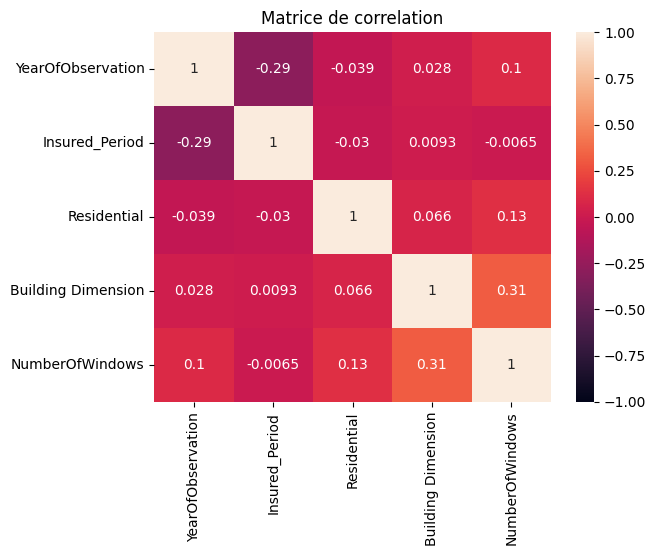

In [64]:
df_corr=df.corr(numeric_only=True)

sns.heatmap(df_corr,annot=True,vmin=-1,vmax=1)
plt.title('Matrice de correlation')
plt.show()

<Axes: xlabel='Building Dimension', ylabel='Density'>

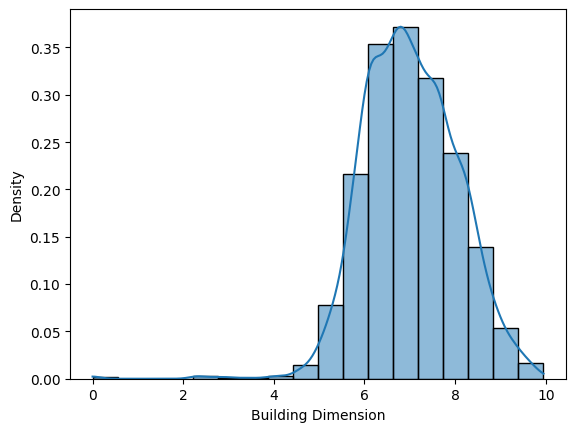

In [65]:
sns.histplot(x="Building Dimension", data=df,bins=18, kde=True, stat='density')

traitement des valeurs manquante pour l'attribut garden 

In [66]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Garden'] = imputer.fit_transform(df[['Garden']]).ravel()

df.isnull().sum()

YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension     0
Building_Type          0
NumberOfWindows        0
Geo_Code              49
Claim                  0
dtype: int64

<Axes: xlabel='Geo_Code', ylabel='count'>

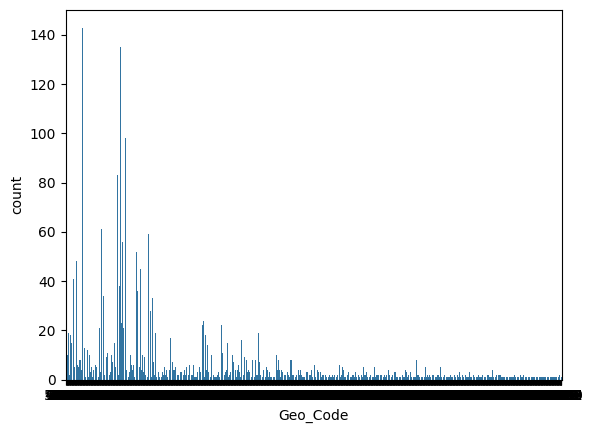

In [67]:
sns.countplot(x='Geo_Code', data=df)

1 methode de cramer pour savoir le quel des attribut a une forte relation avec Geo_Code

In [68]:
from scipy.stats import chi2_contingency

l_discret=list(df.select_dtypes(include='object'))[:-2]
print(l_discret)
for elm in l_discret:
    print(elm)
    contingency_table = pd.crosstab(df['Geo_Code'], df[elm])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calcul de Cramér's V
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

    print(f"Cramér's V: {cramers_v}")

df.isnull().sum()

['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type']
Building_Painted
Cramér's V: 0.5445822380368132
Building_Fenced
Cramér's V: 0.5686815732879572
Garden
Cramér's V: 0.5689058567918664
Settlement
Cramér's V: 0.5691477986044924
Building_Type
Cramér's V: 0.9836017609248647


YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension     0
Building_Type          0
NumberOfWindows        0
Geo_Code              49
Claim                  0
dtype: int64

Application de l'algorithme RandomForest pour determiner les valeurs manquante de l'attribut Geo_Code

In [69]:
label_encoders = {}
for column in l_discret:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

train = df[df['Geo_Code'].notna()]
test = df[df['Geo_Code'].isna()]

# Modèle de classification
clf = RandomForestClassifier()
clf.fit(train[l_discret], train['Geo_Code'])

# Prédire les valeurs manquantes
df.loc[df['Geo_Code'].isna(), 'Geo_Code'] = clf.predict(test[l_discret])

In [70]:
df.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [71]:
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,1,1,1,1,8.232174,0,0,43157,oui
1,2015,1.0,0,1,0,0,0,7.280697,0,5,58194,non
2,2013,1.0,1,1,0,0,0,7.572503,2,6,92050,oui
3,2015,1.0,0,0,1,1,1,7.727535,1,0,13209,oui
4,2016,0.5,0,1,0,0,0,7.998335,0,9,5177,non


DISCRETISATION DE YEAR BUILDING DIMENSION 

1 YEAR

<Axes: xlabel='YearOfObservation', ylabel='count'>

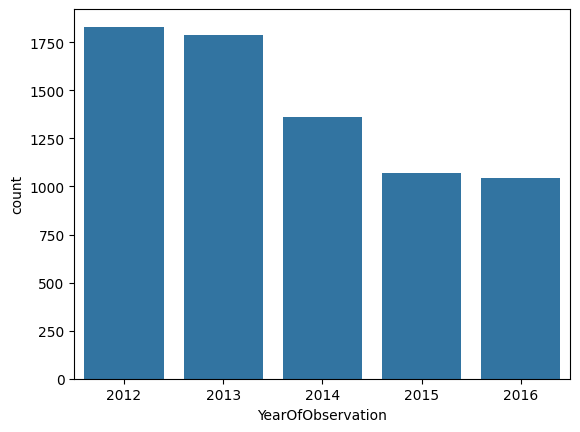

In [72]:
sns.countplot(x='YearOfObservation',data=df)

In [73]:
enc = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy='quantile', subsample=len(df))
df['YearOfObservation'] = enc.fit_transform(df[['YearOfObservation']])


In [74]:
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1.0,0,1,1,1,1,8.232174,0,0,43157,oui
1,3.0,1.0,0,1,0,0,0,7.280697,0,5,58194,non
2,1.0,1.0,1,1,0,0,0,7.572503,2,6,92050,oui
3,3.0,1.0,0,0,1,1,1,7.727535,1,0,13209,oui
4,3.0,0.5,0,1,0,0,0,7.998335,0,9,5177,non


<Axes: xlabel='Geo_Code', ylabel='count'>

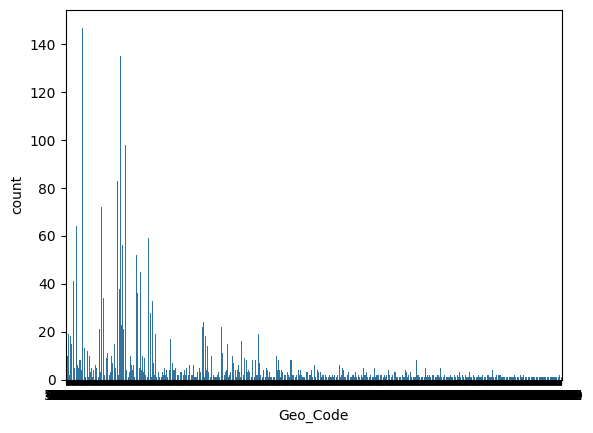

In [75]:
sns.countplot(x='Geo_Code',data=df)

In [76]:
label_encoder = LabelEncoder()
df['Geo_Code'] = label_encoder.fit_transform(df['Geo_Code'])
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1.0,0,1,1,1,1,8.232174,0,0,436,oui
1,3.0,1.0,0,1,0,0,0,7.280697,0,5,544,non
2,1.0,1.0,1,1,0,0,0,7.572503,2,6,1200,oui
3,3.0,1.0,0,0,1,1,1,7.727535,1,0,77,oui
4,3.0,0.5,0,1,0,0,0,7.998335,0,9,490,non


REDUCTION DE DIMENSION

In [77]:
X = df.drop('Claim', axis=1)  
y = df['Claim']  # Colonne cible

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Récupération de l'importance des caractéristiques
feature_importances = model.feature_importances_

# Création d'un DataFrame pour visualiser les importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Affiche les caractéristiques les plus importantes
print(importance_df)

               Feature  Importance
7   Building Dimension    0.418932
10            Geo_Code    0.291678
0    YearOfObservation    0.088816
9      NumberOfWindows    0.069261
8        Building_Type    0.053431
1       Insured_Period    0.028158
2          Residential    0.022012
3     Building_Painted    0.016561
5               Garden    0.003840
6           Settlement    0.003707
4      Building_Fenced    0.003605


In [78]:
n_top_features = 6
important_features = importance_df['Feature'].head(n_top_features)
# X_reduced = X[important_features]
X_reduced =X
X_reduced


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code
0,1.0,1.0,0,1,1,1,1,8.232174,0,0,436
1,3.0,1.0,0,1,0,0,0,7.280697,0,5,544
2,1.0,1.0,1,1,0,0,0,7.572503,2,6,1200
3,3.0,1.0,0,0,1,1,1,7.727535,1,0,77
4,3.0,0.5,0,1,0,0,0,7.998335,0,9,490
...,...,...,...,...,...,...,...,...,...,...,...
7084,1.0,1.0,0,0,1,1,1,6.309918,2,0,256
7085,0.0,0.5,0,1,0,0,0,6.907755,0,4,31
7086,3.0,1.0,1,1,0,0,0,6.173786,2,3,1266
7087,0.0,0.5,0,1,0,0,0,6.284134,0,4,903


DES ALGORITHME DE PREDICTION

division du dataset partie test et train 

In [90]:
df_test= df.iloc[nombre_lignes_fichier1:]
df_train=df.iloc[:nombre_lignes_fichier1]

df_train

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1.0,0,1,1,1,1,8.232174,0,0,436,oui
1,3.0,1.0,0,1,0,0,0,7.280697,0,5,544,non
2,1.0,1.0,1,1,0,0,0,7.572503,2,6,1200,oui
3,3.0,1.0,0,0,1,1,1,7.727535,1,0,77,oui
4,3.0,0.5,0,1,0,0,0,7.998335,0,9,490,non
...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0.0,1.0,1,0,1,1,1,7.122867,3,0,936,non
2143,0.0,1.0,0,0,1,1,1,6.802395,1,0,650,non
2144,1.0,1.0,1,1,0,0,0,8.513988,1,4,234,oui
2145,3.0,0.5,0,0,1,1,1,6.396930,3,0,577,oui


#1Random forest

In [80]:
X = df_train.drop('Claim', axis=1)  
y = df_train['Claim']  # Colonne cible

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42,max_depth=6)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=42)

Accuracy: 0.758988015978695
Precision: 0.4968684759916493
Recall: 0.6629526462395543
F1 Score: 0.568019093078759


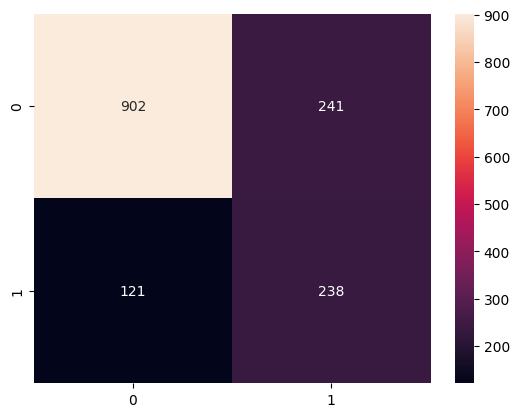

In [81]:
from sklearn.metrics import classification_report

Y_p_train= rf_model.predict(X_train)
cm=confusion_matrix(y_train, Y_p_train)
sns.heatmap(cm, annot=True, fmt="d")
accuracy = accuracy_score(y_train, Y_p_train)
precision = precision_score(y_train, Y_p_train, pos_label='oui') 
recall = recall_score(y_train, Y_p_train, pos_label='oui')
f1 = f1_score(y_train, Y_p_train, pos_label='oui')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# print(classification_report(y_train, Y_p_train))

Accuracy: 0.7085271317829457
Precision: 0.4155251141552511
Recall: 0.6026490066225165
F1 Score: 0.4918918918918918


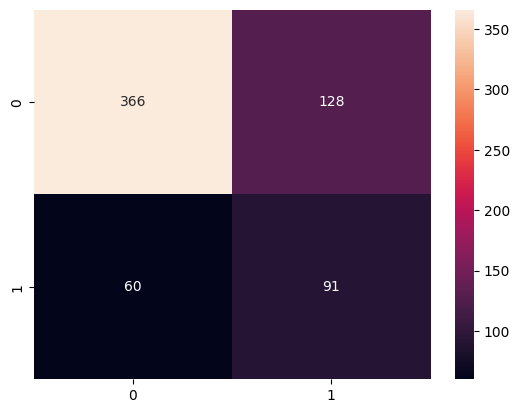

In [82]:
Y_p_test = rf_model.predict(X_test)
cm=confusion_matrix(y_test, Y_p_test)
sns.heatmap(cm, annot=True, fmt="d")

# Calcul des métriques de performance avec la classe positive définie sur 'oui'
accuracy = accuracy_score(y_test, Y_p_test)
precision = precision_score(y_test, Y_p_test, pos_label='oui') 
recall = recall_score(y_test, Y_p_test, pos_label='oui')
f1 = f1_score(y_test, Y_p_test, pos_label='oui')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [83]:
counts = df_train['Claim'].value_counts()

# Affiche les résultats
print("Nombre de 'oui' :", counts.get('oui', 0))
print("Nombre de 'non' :", counts.get('non', 0))

Nombre de 'oui' : 510
Nombre de 'non' : 1637


code mouheb 

In [85]:
print("Distribution initiale :")
print(df_train['Claim'].value_counts())

# Séparer les deux classes
df_non = df_train[df_train['Claim'] == 'non']
df_oui = df_train[df_train['Claim'] == 'oui']

# Réduire la classe majoritaire (non) à 799 exemples
df_non_sampled = df_non.sample(n=600, random_state=42)

# Combiner avec tous les exemples de la classe minoritaire (oui)
df_balanced = pd.concat([df_non_sampled, df_oui])

# Réindexer et mélanger les données pour éviter tout biais
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Vérifiez la nouvelle distribution
print("\nDistribution après équilibrage :")
print(df_balanced['Claim'].value_counts())

Distribution initiale :
Claim
non    1637
oui     510
Name: count, dtype: int64

Distribution après équilibrage :
Claim
non    600
oui    510
Name: count, dtype: int64


In [88]:
df_balanced

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,0.0,1.0,1,1,0,0,0,6.907755,2,5,1203,oui
1,2.0,1.0,0,1,0,0,0,8.074960,0,2,67,non
2,3.0,0.5,0,1,0,0,0,6.770789,0,3,1146,non
3,3.0,0.5,0,1,0,0,0,8.894396,3,8,610,oui
4,2.0,1.0,1,0,1,1,1,7.586804,1,0,29,oui
...,...,...,...,...,...,...,...,...,...,...,...,...
1105,2.0,1.0,1,1,0,0,0,7.025538,2,5,731,non
1106,2.0,1.0,0,1,1,1,1,7.318540,1,0,198,non
1107,2.0,1.0,1,1,0,0,0,9.440023,2,8,1187,oui
1108,1.0,1.0,0,1,1,1,1,9.309009,0,0,145,oui


TRAIN WITH EQUAL DATASET

Accuracy: 0.8747747747747747
Confusion Matrix: [[583  17]
 [122 388]]
Classification Report:               precision    recall  f1-score   support

         non       0.83      0.97      0.89       600
         oui       0.96      0.76      0.85       510

    accuracy                           0.87      1110
   macro avg       0.89      0.87      0.87      1110
weighted avg       0.89      0.87      0.87      1110



<Axes: >

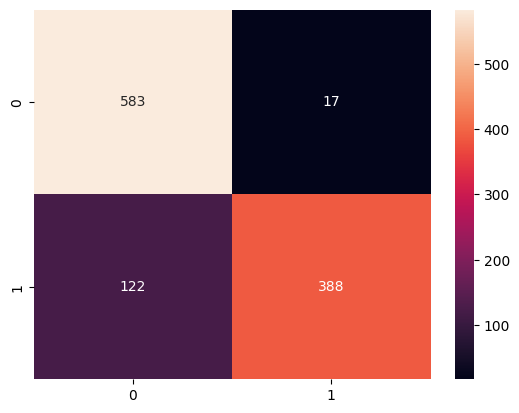

In [92]:
X = df_balanced.drop('Claim', axis=1)
y = df_balanced['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# entrainer le modèle
# model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


y_pred = model.predict(X)


print('Accuracy:', accuracy_score(y, y_pred))
print('Confusion Matrix:', confusion_matrix(y, y_pred))
print('Classification Report:', classification_report(y, y_pred))


sns.heatmap(confusion_matrix(y, y_pred),annot=True,fmt="d")

nahiit el reduction mtaa el dimesion fel train w kaaed el mochkel mtaa les attribut discret fel test 

TEST 

Accuracy: 0.9275596924322137
Confusion Matrix: [[3724  103]
 [ 255  860]]
Classification Report:               precision    recall  f1-score   support

         non       0.94      0.97      0.95      3827
         oui       0.89      0.77      0.83      1115

    accuracy                           0.93      4942
   macro avg       0.91      0.87      0.89      4942
weighted avg       0.93      0.93      0.93      4942



<Axes: >

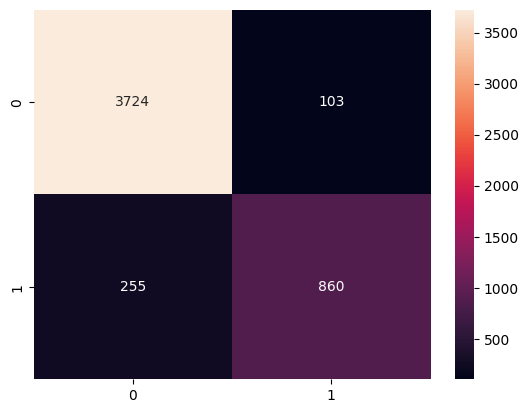

In [93]:
X = df_test.drop('Claim', axis=1)
y = df_test['Claim']


y_pred = model.predict(X)


print('Accuracy:', accuracy_score(y, y_pred))
print('Confusion Matrix:', confusion_matrix(y, y_pred))
print('Classification Report:', classification_report(y, y_pred))


sns.heatmap(confusion_matrix(y, y_pred),annot=True,fmt="d")